# Introduction




In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from scipy.stats import boxcox
from numpy import array
from numpy.linalg import eig
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from numpy.linalg import eig

In [303]:
dataframe = pd.read_csv('nyc-rolling-sales.csv')

# Introduction

1.This Data Set consists of 22 columns of Data.

2.Properties sold in New York City over a 12-month period from September 2016 to September 2017.

3.Each Borough is associated with a code Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

4.Class 2 properties consisered as income producing properties



In [304]:
dataframe.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


Already we see some missing data on the Sale Price

In [305]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [306]:
dataframe.isnull().sum()*100/dataframe.isnull().count()

Unnamed: 0                        0.0
BOROUGH                           0.0
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.0
BLOCK                             0.0
LOT                               0.0
EASE-MENT                         0.0
BUILDING CLASS AT PRESENT         0.0
ADDRESS                           0.0
APARTMENT NUMBER                  0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
YEAR BUILT                        0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
SALE DATE                         0.0
dtype: float64

In [307]:
del dataframe['EASE-MENT']
del dataframe['APARTMENT NUMBER']

Many sales occur with a nonsensically small dollar amounts: $0 or " - "

These sales are actually transfers of deeds between parties: 

We will be looking to remove these rows from the data set

In [308]:
#Dropping Data

dataframe['SALE_PRICE'] = dataframe['SALE PRICE']
new_df = dataframe[~dataframe.SALE_PRICE.str.contains("-")]

In [309]:
#Drop Missing Values

new_df['LAND_SQUARE_FEET'] = new_df['LAND SQUARE FEET']

new_df = new_df[~new_df.LAND_SQUARE_FEET.str.contains("-")]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [310]:
new_df['GROSS_SQUARE_FEET'] = new_df['GROSS SQUARE FEET']
new_df = new_df[~new_df.GROSS_SQUARE_FEET.str.contains("-")]

In [311]:
new_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE,LAND_SQUARE_FEET,GROSS_SQUARE_FEET
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,...,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,6625000,1633,6440
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,...,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,3936272,2272,6794
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,...,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,8000000,2369,4615
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,...,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00,3192840,1750,4226
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,...,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00,16232000,4489,18523


In [312]:
#Turning Sale_price Numeric
new_df['SALE_PRICE'] = pd.to_numeric(new_df['SALE_PRICE'], errors='coerce')

#Turning LAND_SQUARE_FEET Numeric
new_df['LAND_SQUARE_FEET'] = pd.to_numeric(new_df['LAND_SQUARE_FEET'], errors='coerce')

#Turning GROSS_SQUARE_FEET Numeric
new_df['GROSS_SQUARE_FEET'] = pd.to_numeric(new_df['GROSS_SQUARE_FEET'], errors='coerce')

In [313]:
#Checking For Duplicates
sum(new_df.duplicated(new_df.columns))

0

In [314]:
new_df['BOROUGH'].describe()

count    48244.000000
mean         3.251741
std          0.903136
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: BOROUGH, dtype: float64

In [315]:
#Naming Each Borough

# new_df['BOROUGH_Name']=[new_df['BOROUGH'] == 1] = 'Manhattan'
# new_df['BOROUGH_Name']=[new_df['BOROUGH'] == 2] = 'Bronx'
# new_df['BOROUGH_Name']=[new_df['BOROUGH'] == 3] = 'Brooklyn'
# new_df['BOROUGH_Name']=[new_df['BOROUGH'] == 4] = 'Queens'
# new_df['BOROUGH_Name']=[new_df['BOROUGH'] == 5] = 'Staten Island'


In [316]:

# dataframe['Combined']= (dataframe['Income composition of resources']*dataframe['Schooling']/2 )

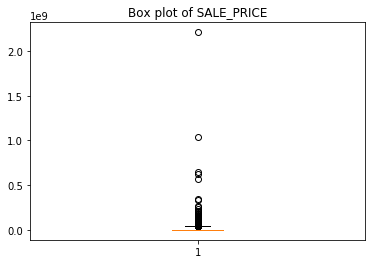

In [317]:
plt.boxplot(new_df["SALE_PRICE"],whis=50)
plt.title("Box plot of SALE_PRICE")
plt.show()

The Sale price has a wide range of values.

We will need to remove values that are anything below the mean 100000

In [318]:
new_df["SALE_PRICE"].describe()

count    4.824400e+04
mean     1.153281e+06
std      1.340131e+07
min      0.000000e+00
25%      8.042000e+04
50%      4.800000e+05
75%      8.300000e+05
max      2.210000e+09
Name: SALE_PRICE, dtype: float64

In [338]:
#Removing Outliers and Data Below 100,000
new_df = new_df[(new_df['SALE_PRICE'] > 100000)]

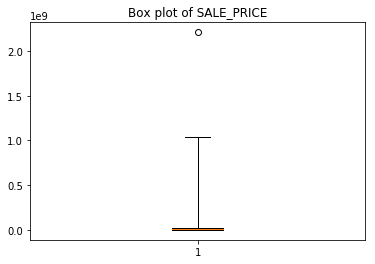

In [345]:
plt.boxplot(new_df["SALE_PRICE"],whis=100)
plt.title("Box plot of SALE_PRICE")
plt.show()

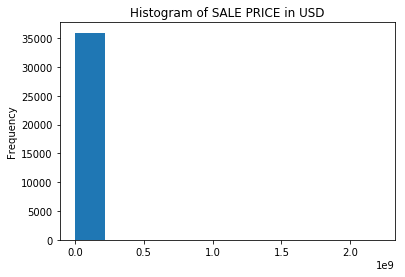

In [321]:
plt.hist(new_df["SALE_PRICE"])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Frequency')
plt.show()

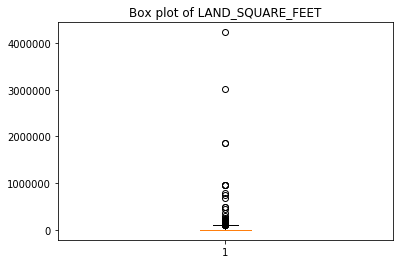

In [322]:
#Checking For Land Square Feet
plt.boxplot(new_df["LAND_SQUARE_FEET"],whis=50)
plt.title("Box plot of LAND_SQUARE_FEET")
plt.show()

In [323]:
new_df["LAND_SQUARE_FEET"].describe()

count    3.595500e+04
mean     3.388366e+03
std      3.398231e+04
min      0.000000e+00
25%      1.440000e+03
50%      2.213000e+03
75%      3.300000e+03
max      4.228300e+06
Name: LAND_SQUARE_FEET, dtype: float64

In [324]:
new_df = new_df[(new_df['LAND_SQUARE_FEET'] > 20000)]

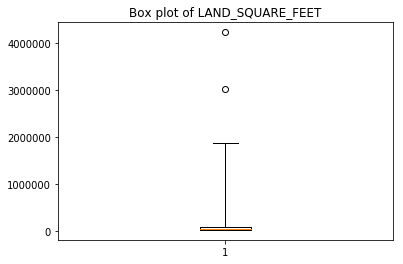

In [325]:
plt.boxplot(new_df["LAND_SQUARE_FEET"],whis=50)
plt.title("Box plot of LAND_SQUARE_FEET")
plt.show()

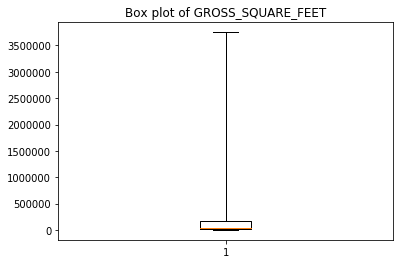

In [326]:
plt.boxplot(new_df["GROSS_SQUARE_FEET"],whis=50)
plt.title("Box plot of GROSS_SQUARE_FEET")
plt.show()

In [327]:
new_df["GROSS_SQUARE_FEET"].describe()

count    2.730000e+02
mean     1.401566e+05
std      3.034683e+05
min      0.000000e+00
25%      1.000000e+04
50%      4.500000e+04
75%      1.650000e+05
max      3.750565e+06
Name: GROSS_SQUARE_FEET, dtype: float64

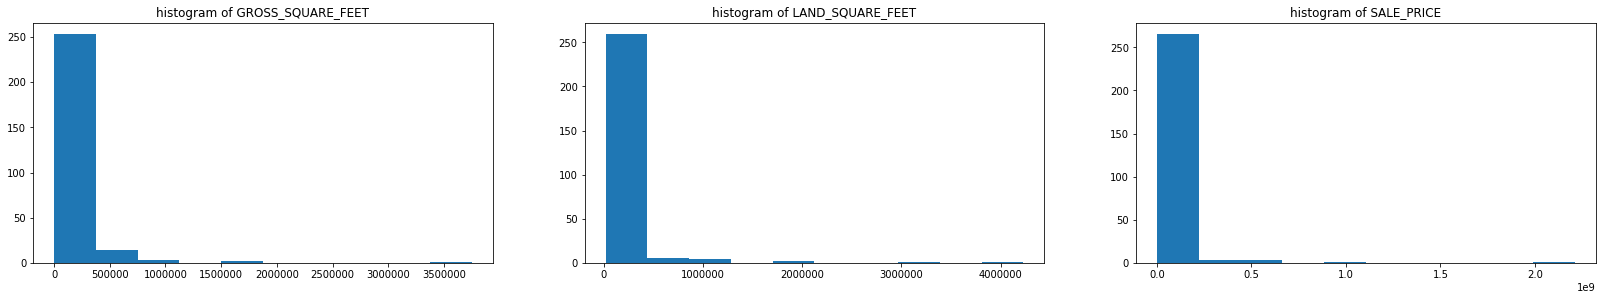

In [328]:
plt.figure(figsize=(28,15))



# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(new_df["GROSS_SQUARE_FEET"])
plt.title("histogram of GROSS_SQUARE_FEET")


plt.subplot(3, 3, 2)
plt.hist(new_df["LAND_SQUARE_FEET"])
plt.title("histogram of LAND_SQUARE_FEET")

plt.subplot(3, 3, 3)
plt.hist(new_df["SALE_PRICE"])
plt.title("histogram of SALE_PRICE")

plt.show()





In [329]:

plt.figure(figsize=(10,6))
plt.bar(x='BOROUGH', y='SALE_PRICE',data=new_df)
plt.title('Sale Price Distribution by Borough')
plt.show()


TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 720x432 with 0 Axes>

In [ ]:
y_pos = new_df['SALE_PRICE']
performance = new_df['BOROUGH']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

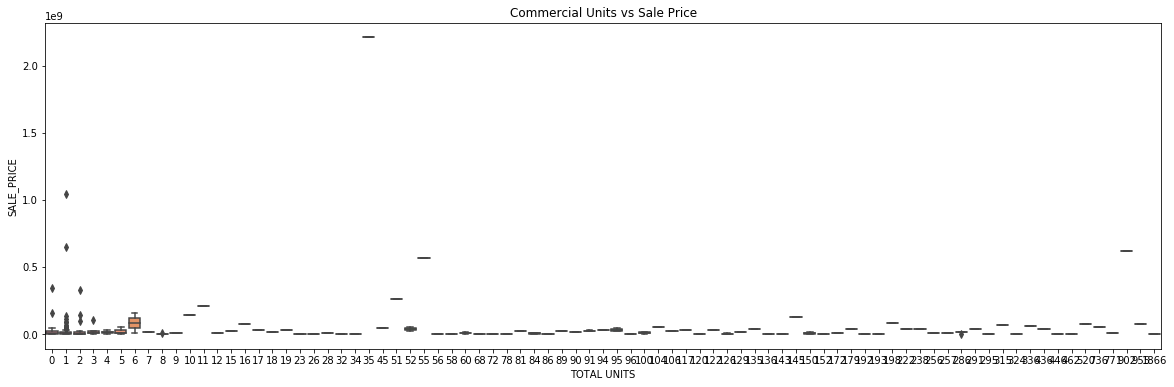

In [330]:
plt.figure(figsize=(20,6))
sns.boxplot(x='TOTAL UNITS', y='SALE_PRICE', data=new_df)
plt.title('TOTAL UNITS vs Sale Price')
plt.show()

Text(0, 0.5, 'LAND_SQUARE_FEET')

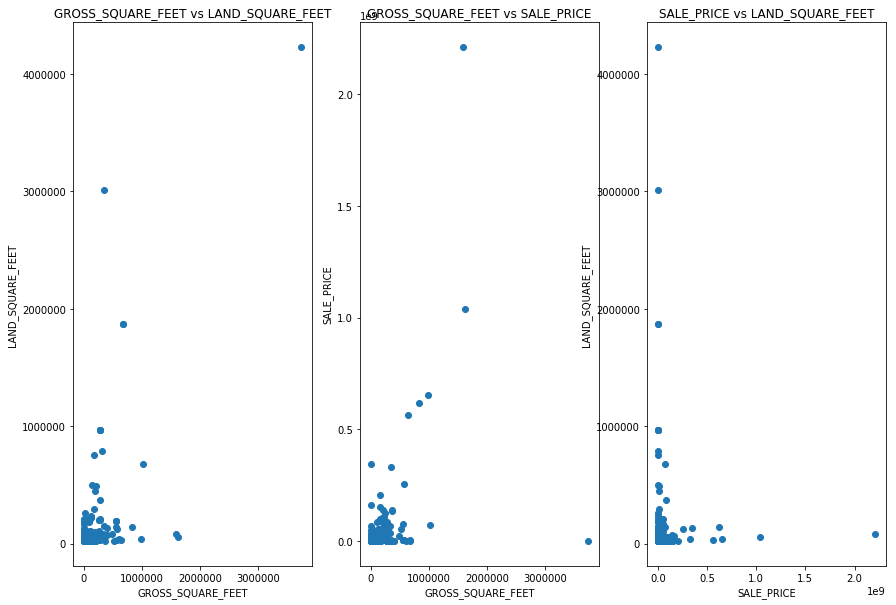

In [331]:
plt.figure(figsize=(30,10))

plt.subplot(1,6,1)
plt.scatter(new_df["GROSS_SQUARE_FEET"], new_df["LAND_SQUARE_FEET"])
plt.title("GROSS_SQUARE_FEET vs LAND_SQUARE_FEET")
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('LAND_SQUARE_FEET')

plt.subplot(1,6,2)
plt.scatter(new_df["GROSS_SQUARE_FEET"], new_df["SALE_PRICE"])
plt.title("GROSS_SQUARE_FEET vs SALE_PRICE")
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE')

plt.subplot(1,6,3)
plt.scatter(new_df["SALE_PRICE"], new_df["LAND_SQUARE_FEET"])
plt.title("SALE_PRICE vs LAND_SQUARE_FEET")
plt.xlabel('SALE_PRICE')
plt.ylabel('LAND_SQUARE_FEET')



In [332]:
def data_function(data1,data2):

    new_df1 = pd.DataFrame()
    new_df1['SALE_PRICE'] = (new_df['SALE_PRICE'] - new_df['SALE_PRICE'].mean()) / new_df['SALE_PRICE'].std()
    new_df[data1] = (new_df[data1] - new_df[data1].mean()) / new_df[data1].std()

    t = sns.regplot(
    data1,
    'SALE_PRICE',
    new_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
    )
    t.axhline(0, color='k', linestyle='-', linewidth=2)
    t.axvline(0, color='k', linestyle='-', linewidth=2)
    t.axes.set_title(data2)

    sns.regplot(data1,'SALE_PRICE',
            new_df, 
            scatter=False, 
            color="red")

    plt.show()
    
    
    

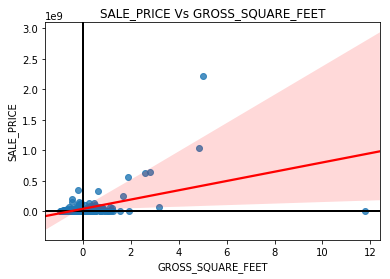

In [333]:
data_function('GROSS_SQUARE_FEET',"SALE_PRICE Vs GROSS_SQUARE_FEET")

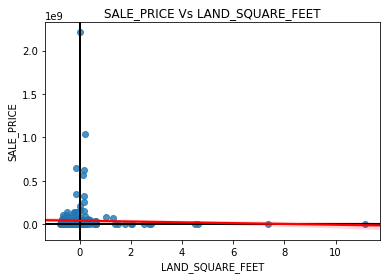

In [334]:
data_function('LAND_SQUARE_FEET',"SALE_PRICE Vs LAND_SQUARE_FEET")

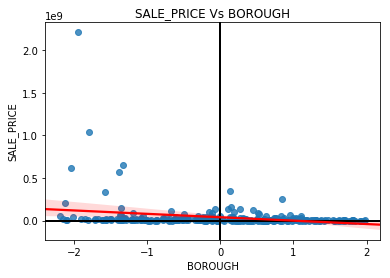

In [335]:
data_function('BOROUGH',"SALE_PRICE Vs BOROUGH")

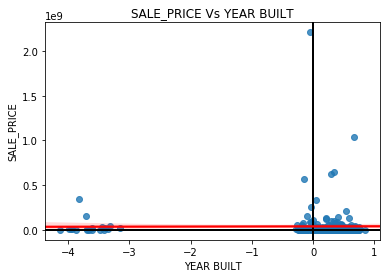

In [336]:
data_function('YEAR BUILT',"SALE_PRICE Vs YEAR BUILT")

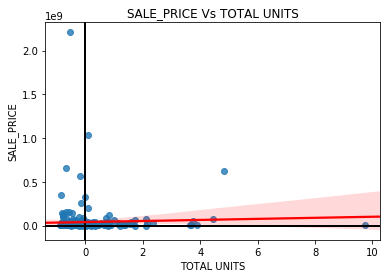

In [337]:
data_function('TOTAL UNITS',"SALE_PRICE Vs TOTAL UNITS")